Performing **Hierarchial Clustering** (single, average, complete link)

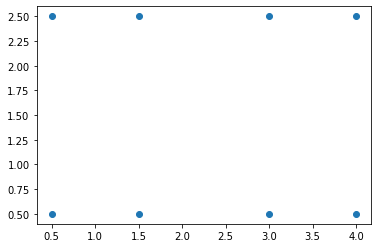

In [ ]:
# x y coordinates for clusters a b c d e f g h

x = [0.5, 1.5,   3,   4, 0.5, 1.5,   3,   4]
y = [2.5, 2.5, 2.5, 2.5, 0.5, 0.5, 0.5, 0.5]

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,0.5,2.5
1,1.5,2.5
2,3.0,2.5
3,4.0,2.5
4,0.5,0.5
5,1.5,0.5
6,3.0,0.5
7,4.0,0.5


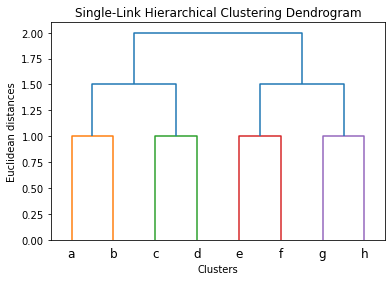

In [ ]:
import scipy.cluster.hierarchy as sch

# performing single-link hierarchial clustering
linkage = sch.linkage(df, method  = "single", metric='euclidean')

# changing index of the dataframe for plotting purpose
df.index = ['a','b','c','d','e','f','g','h']

# creating the dendrogram
sch.dendrogram(linkage, labels=df.index)

plt.title('Single-Link Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

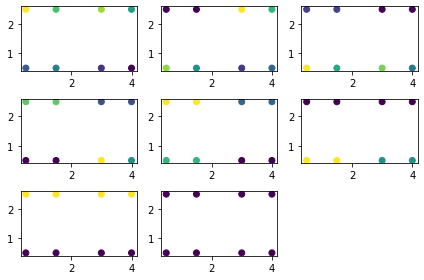

In [ ]:
from sklearn.cluster import AgglomerativeClustering

points = list(zip(x, y)) # putting the x & y coordinates together

def hierarchial_clustering(algorithm_type):
  fig = plt.figure()

  plot_count = 0
  for cluster_count in range(len(df.index),0,-1): # iterating down from the total number of clusters
    cluster_parameters = AgglomerativeClustering(n_clusters = cluster_count, linkage = algorithm_type, affinity = 'euclidean') # setting parameters for the clusters
    cluster_groups = cluster_parameters.fit_predict(points) # creating the clusters
    plot_count += 1
    plt.subplot(3, 3, plot_count) # adding subplots one-by-one
    plt.scatter(x, y, c=cluster_groups) # creating scatter plot & coloring by clusters

  plt.tight_layout()
  plt.show()

hierarchial_clustering('single')

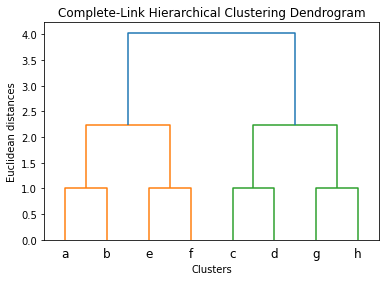

In [ ]:
# performing complete-link hierarchical clustering
linkage = sch.linkage(df, method  = "complete", metric='euclidean')
# creating the dendrogram
sch.dendrogram(linkage, labels=df.index)

plt.title('Complete-Link Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

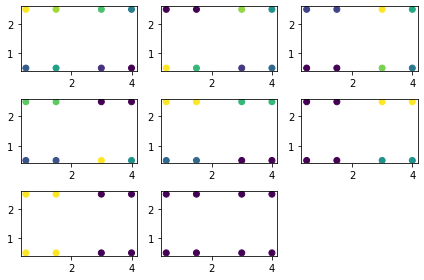

In [ ]:
hierarchial_clustering('complete')

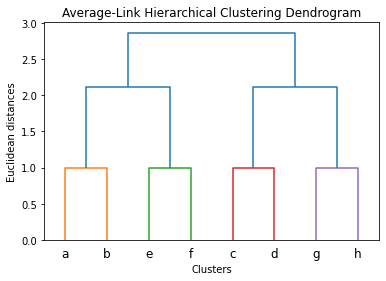

In [ ]:
# performing average-link hierarchical clustering
linkage = sch.linkage(df, method  = "average", metric='euclidean')
# creating the dendrogram
sch.dendrogram(linkage, labels=df.index)

plt.title('Average-Link Hierarchical Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.show()

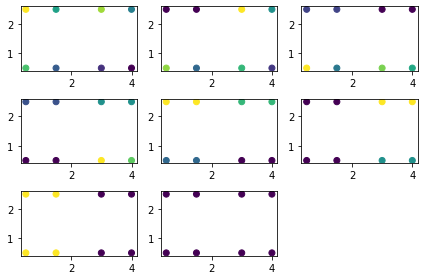

In [ ]:
hierarchial_clustering('average')

**K-means Clustering**

[(86, 75), (24, 7), (21, 70), (76, 37), (63, 32), (48, 39), (91, 57), (60, 67), (78, 82), (39, 48), (19, 65), (66, 54), (29, 8), (34, 31), (44, 30), (94, 84), (35, 33), (53, 9), (62, 73), (31, 94)]


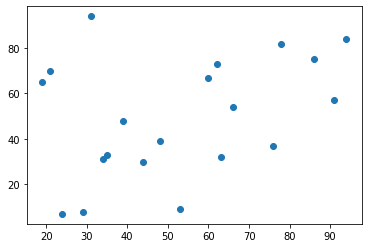

In [ ]:
# generating 20 random numbers from 0 to 100
import random

x2 = random.sample(range(0,100), 20)
y2 = random.sample(range(0,100), 20)

points2 = list(zip(x2, y2)) # putting the x & y coordinates together
print(points2)

plt.scatter(x2, y2)
plt.show()

In [ ]:
# generating 1 random number from 2 to 4
k = random.randrange(2,4,1)
print('final number of clusters is', k)

from sklearn.cluster import KMeans

cluster_counts = list(reversed(range(k,21))) # making a list with numbers counting down from 20 to k
print('number of iterations is', len(cluster_counts))

kmeans_iterations = []
for k in cluster_counts:
  kmeans_parameters = KMeans(n_clusters=k, # number of clusters
                             random_state=0 # prevents the clusters from being numbered differently after each iteration
                             )
  kmeans_groups = kmeans_parameters.fit_predict(points2)
  kmeans_iterations.append(kmeans_groups)

kidf = pd.DataFrame(kmeans_iterations, columns = points2)
kidf

final number of clusters is 3
number of iterations is 18


,"(86, 75)","(24, 7)","(21, 70)","(76, 37)","(63, 32)","(48, 39)","(91, 57)","(60, 67)","(78, 82)","(39, 48)","(19, 65)","(66, 54)","(29, 8)","(34, 31)","(44, 30)","(94, 84)","(35, 33)","(53, 9)","(62, 73)","(31, 94)"
0,15,18,17,8,12,2,6,16,9,13,3,7,0,19,14,4,11,10,1,5
1,15,18,17,8,12,2,6,16,9,13,3,7,0,11,14,4,11,10,1,5
2,15,0,17,8,12,2,6,16,9,13,3,7,0,11,14,4,11,10,1,5
3,15,0,3,8,12,2,6,16,9,13,3,7,0,11,14,4,11,10,1,5
4,15,0,3,8,12,2,6,1,9,13,3,7,0,11,14,4,11,10,1,5
5,6,5,2,11,4,7,3,1,13,12,2,10,5,0,7,14,0,9,1,8
6,4,5,2,13,3,9,0,7,4,12,2,11,5,1,9,8,1,6,7,10
7,9,0,3,8,12,2,6,1,9,2,3,7,0,11,11,4,11,10,1,5
8,9,0,3,8,8,2,6,1,9,2,3,7,0,11,11,4,11,10,1,5
9,2,3,6,1,1,9,7,5,2,9,6,10,3,4,4,2,4,8,5,0


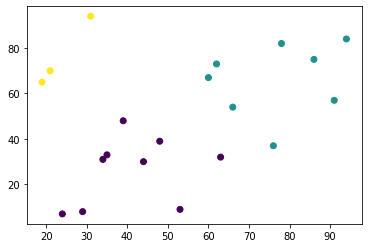

In [ ]:
# viewing the final k clusters
plt.scatter(x2, y2, c=kidf.iloc[-1]) # creating scatter plot with clusters colored by a row in the dataframe
plt.show()

Attempting hierarchial clustering by modifying a pandas dataframe

In [ ]:
df = pd.DataFrame({'x':x, 'y':y})

from scipy.spatial import distance
import numpy as np

eddf = []
for i in df.index:
  row = []
  for j in df.index:
    p = (df.iloc[i][0], df.iloc[i][1]) # x and y values of one point
    q = (df.iloc[j][0], df.iloc[j][1]) # x and y values of another point
    ed = distance.euclidean(p, q) # calculating euclidean distance between two points
    row.append(ed) # appending new value to row
    if ed == 0:
      row[0:j] = [0]*j # if the value is 0, replacing all elements in list before this one with 0
  eddf.append(row) # appending the row to the nested list

eddf = pd.DataFrame(eddf
                     , columns = ['a','b','c','d','e','f','g','h']
                     ) # turning a nested list into a dataframe
eddf.index = ['a','b','c','d','e','f','g','h']
eddf.replace(0, np.nan, inplace=True) # replacing all 0 values with NaN values
#eddf

In [ ]:
def custom_hierarchial_clustering(eddf, linkage):
  print(eddf)
  while len(eddf.columns) != 1:
    print('current minimum value is', eddf.min().min()) # printing minimum value
    for i in eddf: # for each column 
      # finding locations of minimum values
      if eddf.min().min() in list(eddf[i]): # check if the minimum value is in the column
        r = eddf.index[eddf[i] == eddf.min().min()][0]
        print('row is', r, ', column is', i) # the row & column that the min value is in

        columns_list = list(eddf.columns) # getting the current list of columns
        new_cl = list(set(columns_list) - set([r,i])) # removing the row and column in current combination from that list
        for c in new_cl: # iterating through the other columns
          new_l = [eddf.at[r,c], eddf.at[i,c]] # getting two euclidean distances
          new_l.sort() # sorting from lowest to highest
          if linkage == 'single':
            eddf.at[r,c] = new_l[0] # setting the euclidean distance at that point to the lower value
    
        eddf.drop(i, inplace=True, axis=1) # remove a column
        eddf.drop(i, inplace=True, axis=0) # remove a row
        eddf.rename({r:str(r)+str(i)}, axis=1, inplace=True) # renaming a column
        eddf.rename({r:str(r)+str(i)}, axis=0, inplace=True) # renaming a row

        print(eddf)

custom_hierarchial_clustering(eddf, 'single')

    a    b    c    d         e         f         g         h
a NaN  1.0  2.5  3.5  2.000000  2.236068  3.201562  4.031129
b NaN  NaN  1.5  2.5  2.236068  2.000000  2.500000  3.201562
c NaN  NaN  NaN  1.0  3.201562  2.500000  2.000000  2.236068
d NaN  NaN  NaN  NaN  4.031129  3.201562  2.236068  2.000000
e NaN  NaN  NaN  NaN       NaN  1.000000  2.500000  3.500000
f NaN  NaN  NaN  NaN       NaN       NaN  1.500000  2.500000
g NaN  NaN  NaN  NaN       NaN       NaN       NaN  1.000000
h NaN  NaN  NaN  NaN       NaN       NaN       NaN       NaN
current minimum value is 1.0
row is a , column is b
    ab    c    d         e         f         g         h
ab NaN  1.5  2.5  2.000000  2.000000  2.500000  3.201562
c  NaN  NaN  1.0  3.201562  2.500000  2.000000  2.236068
d  NaN  NaN  NaN  4.031129  3.201562  2.236068  2.000000
e  NaN  NaN  NaN       NaN  1.000000  2.500000  3.500000
f  NaN  NaN  NaN       NaN       NaN  1.500000  2.500000
g  NaN  NaN  NaN       NaN       NaN       NaN  1.000000
